## Name :- Varun Biren Majithia
## Student ID :- 8894799

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


# Define the data directories for training, validation, and test images
data_directory = 'data'
train_directory = os.path.join(data_directory, 'train')
validation_directory = os.path.join(data_directory, 'validation')
test_directory = os.path.join(data_directory, 'test')

# Create an ImageDataGenerator instance with data augmentation settings for training
data_generator_augmented = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Create an ImageDataGenerator instance without data augmentation for validation and test
data_generator_validation = ImageDataGenerator(
    rescale=1.0 / 255.0,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Load images in batches and apply data augmentation during training
batch_size_augmented = 32
image_size = (180, 180)
train_generator_augmented = data_generator_augmented.flow_from_directory(
    directory=train_directory,
    target_size=image_size,
    batch_size=batch_size_augmented,
    class_mode='categorical'
)

# Load images in batches for validation
batch_size_validation = 32
validation_generator = data_generator_validation.flow_from_directory(
    directory=validation_directory,
    target_size=image_size,
    batch_size=batch_size_validation,
    class_mode='categorical'
)
test_generator = data_generator_validation.flow_from_directory(
    directory=test_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'  )

# Load the VGG16 model without the top layers (include_top=False)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,))

# Freeze the layers of the pre-trained VGG16 model
for layer in conv_base.layers:
    layer.trainable = False

# Create the custom model for fine-tuning
inputs = tf.keras.Input(shape=image_size + (3,))
x = conv_base(inputs, training=False)  # Use conv_base directly as a layer
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(train_generator_augmented.num_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model with categorical cross-entropy loss and a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on the augmented training data
num_epochs = 10
model.fit(
    train_generator_augmented,
    epochs=num_epochs,
    validation_data=validation_generator
)


Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/10
24/24 [==============================] - 74s 3s/step - loss: 0.6968 - accuracy: 0.7339 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 73s 3s/step - loss: 0.2415 - accuracy: 0.9099 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 73s 3s/step - loss: 0.1285 - accuracy: 0.9556 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 75s 3s/step - loss: 0.1241 - accuracy: 0.9530 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 73s 3s/step - loss: 0.1204 - accuracy: 0.9583 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 72s 3s/step - loss: 0.1073 - accuracy: 0.9637 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 7/10
24/24 [=====================

In [4]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy",test_acc)

1/1 [==============================] - 1s 1s/step - loss: 9.2740e-04 - accuracy: 1.0000
Test Accuracy 1.0


## Visualizing 5 samples of each class

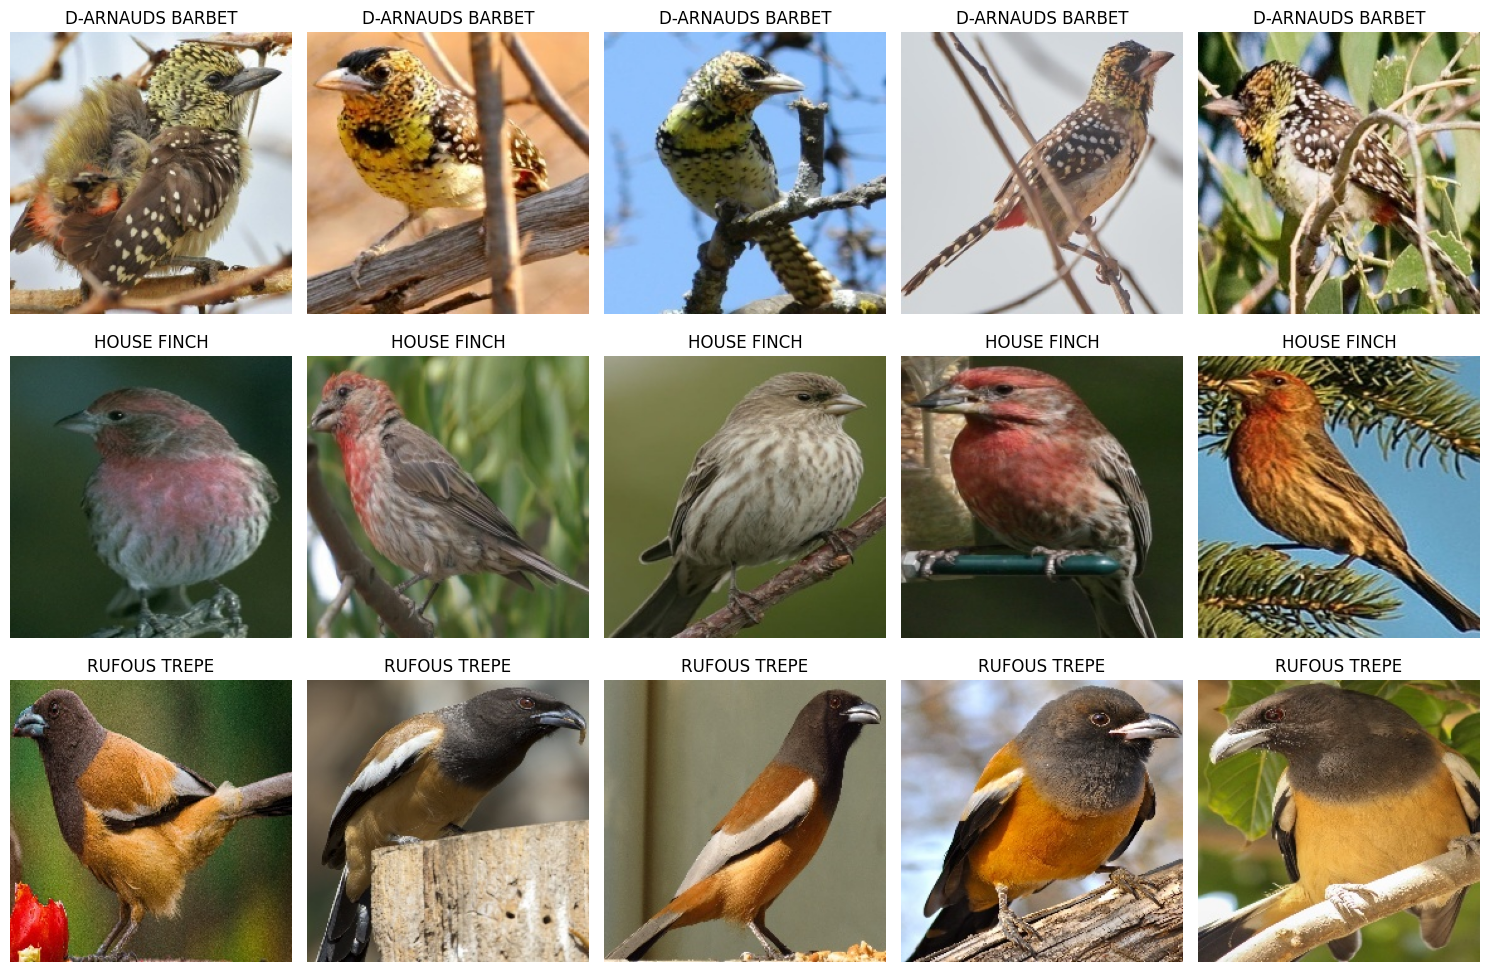

In [7]:
import matplotlib.pyplot as plt
class_names = os.listdir(train_directory)
from tensorflow.keras.preprocessing.image import load_img

# Displaying a few images from each class in the training set
num_images_per_class = 5

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_directory, class_name)
    image_names = os.listdir(class_path)[:num_images_per_class]

    for j, image_name in enumerate(image_names):
        image_path = os.path.join(class_path, image_name)
        img = load_img(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

## Visualizing 5 samles of each class in test set

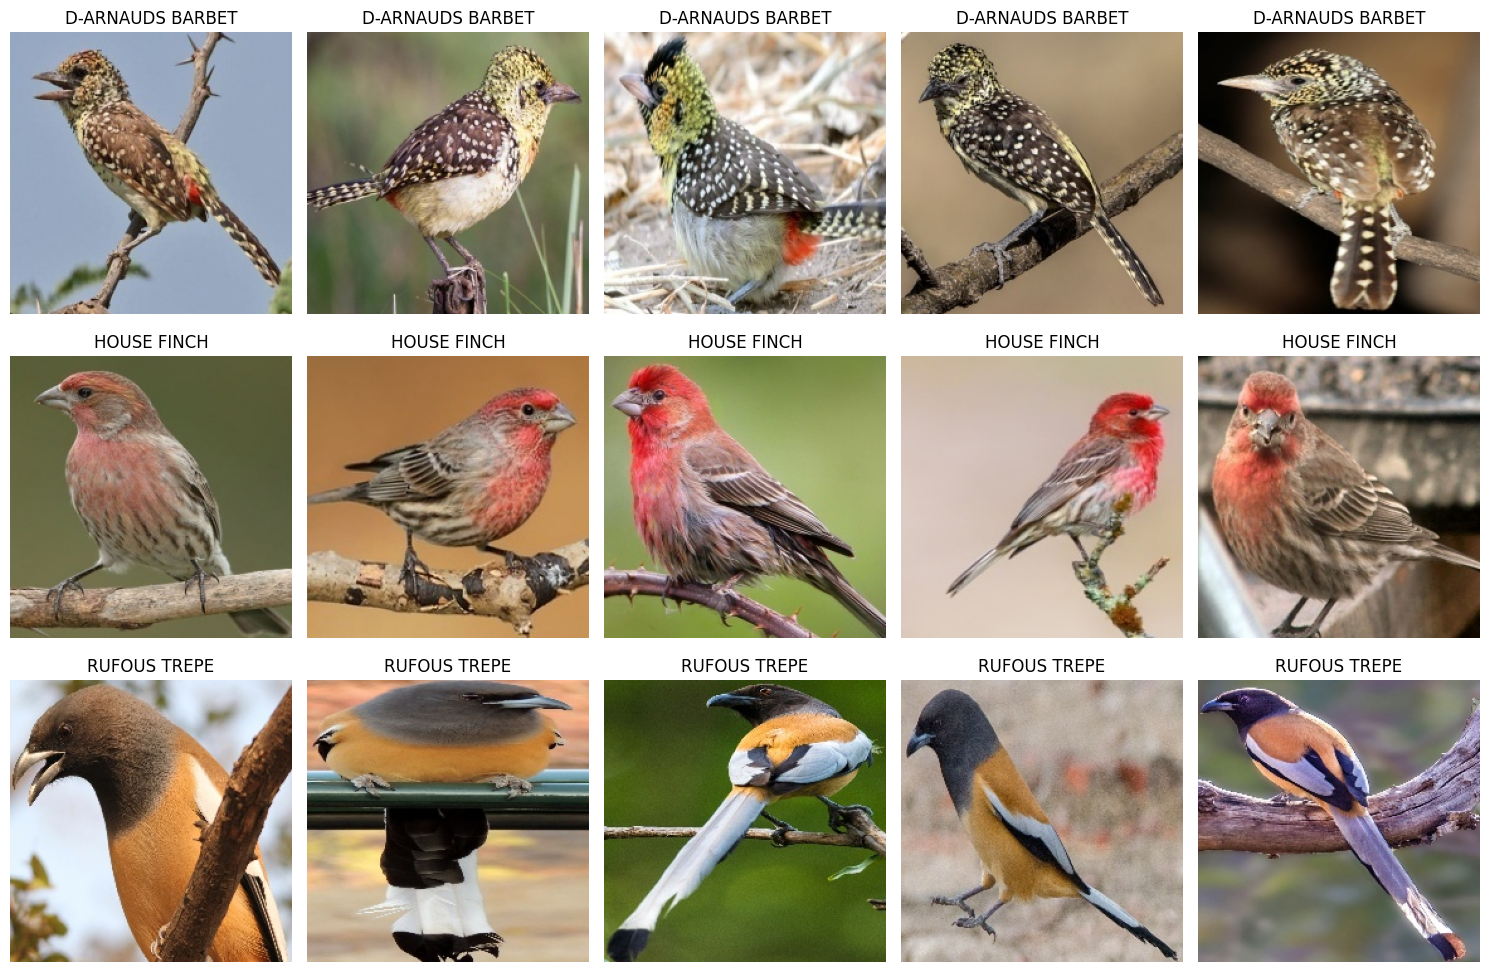

In [70]:
import matplotlib.pyplot as plt
class_names = os.listdir(test_directory)
from tensorflow.keras.preprocessing.image import load_img

# Display a few images from each class in the training set
num_images_per_class = 5

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_directory, class_name)
    image_names = os.listdir(class_path)[:num_images_per_class]

    for j, image_name in enumerate(image_names):
        image_path = os.path.join(class_path, image_name)
        img = load_img(image_path)
        
        plt.subplot(len(class_names), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
#model.save('fine_tuned.h5')
model = tf.keras.models.load_model('fine_tuned.h5')

## Evalution Metrics and exploring Missclassified labels

Found 15 images belonging to 3 classes.


Found 15 images belonging to 3 classes.
1/1 [==============================] - 1s 969ms/step
Validation Accuracy: 1.00
Test Accuracy: 0.60
Confusion Matrix:
[[3 0 2]
 [2 3 0]
 [0 2 3]]
Classification Report:
                  precision    recall  f1-score   support

D-ARNAUDS BARBET       0.60      0.60      0.60         5
     HOUSE FINCH       0.60      0.60      0.60         5
    RUFOUS TREPE       0.60      0.60      0.60         5

        accuracy                           0.60        15
       macro avg       0.60      0.60      0.60        15
    weighted avg       0.60      0.60      0.60        15



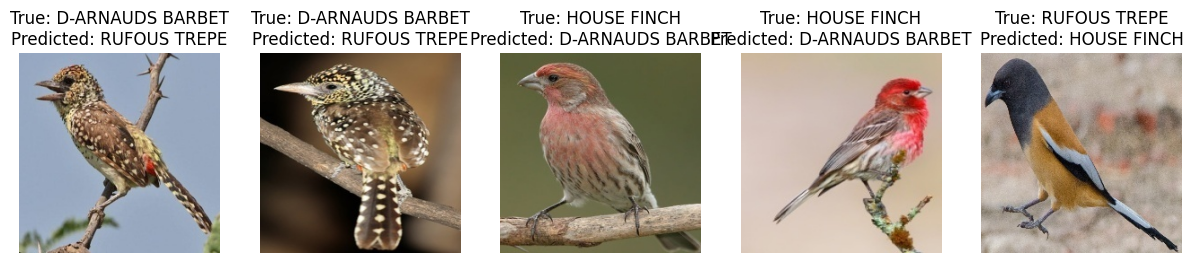

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Creating data generators for validation and test datasets
batch_size = 32
validation_generator = data_generator_augmented.flow_from_directory(
    directory=validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = data_generator_augmented.flow_from_directory(
    directory=test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluating the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
test_loss, test_accuracy = model.evaluate(test_generator)

# Predicting on the test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Calculataing accuracy, confusion matrix, precision, recall, F1-score
accuracy = np.mean(y_true == np.argmax(y_pred, axis=1)) ## here I am rounding of the value of y_pred using argmax so that we can have values as 0,1 and 2 for y_pred
confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
classification_report_str = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_generator.class_indices.keys())

# Printing the results
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_report_str)

misclassified_indices = np.where(y_true != np.argmax(y_pred, axis=1))[0]
num_examples_to_plot = min(5, len(misclassified_indices))

# Get the mapping of class indices to class names from the generator
class_indices_to_names = {v: k for k, v in test_generator.class_indices.items()}

plt.figure(figsize=(15, 10))
for i in range(num_examples_to_plot):
    index = misclassified_indices[i]
    img = plt.imread(test_generator.filepaths[index])
    img_class = class_indices_to_names[y_true[index]]
    pred_class = class_indices_to_names[np.argmax(y_pred[index])]
    plt.subplot(1, num_examples_to_plot, i+1)
    plt.imshow(img)
    plt.title(f'True: {img_class}\nPredicted: {pred_class}')
    plt.axis('off')

plt.show()

## Precision recall curve

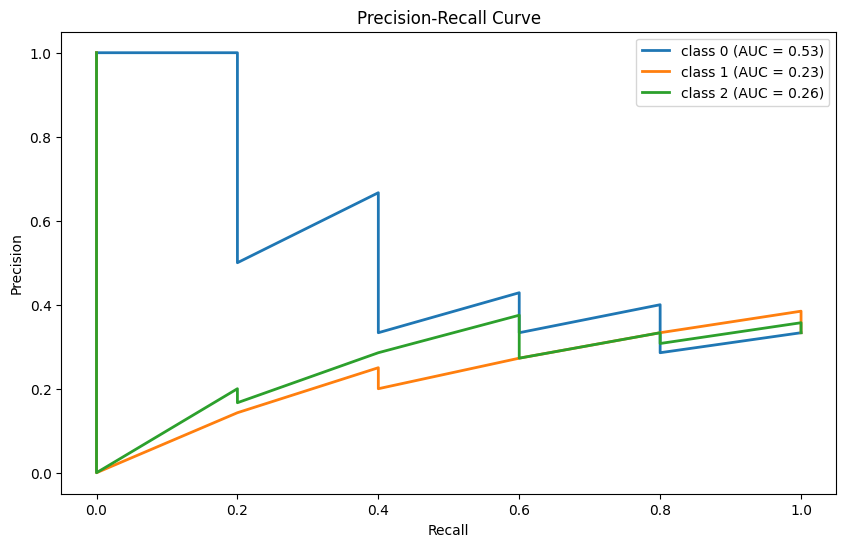

In [67]:
# Calculating precision-recall curve and its AUC for each class
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve,precision_recall_curve,precision_score,accuracy_score,confusion_matrix,f1_score,recall_score
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(train_generator_augmented.num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
    pr_auc[i] = auc(recall[i], precision[i])


# Plotting precision-recall curve and its AUC for each class
plt.figure(figsize=(10, 6))
for i in range(train_generator_augmented.num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()